In [ ]:
# import all required libaries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression as lr
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
irisdf = pd.read_csv("/content/Iris.csv")
#first 5 dataset
irisdf.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#last 5 dataset
irisdf.tail()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
#description of dataset
irisdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# Dimension of data set
irisdf.shape

(150, 6)

In [ ]:
irisdf.size

900

In [ ]:
#check for values of each species whether its balanced or imbalanced
irisdf['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: ylabel='count'>

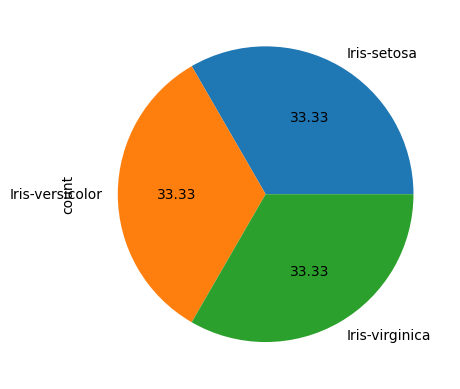

In [ ]:
# Visualization in form of pie chart
irisdf['Species'].value_counts().plot(kind='pie',autopct='%.2f')

PREPROCESSING THE DATASET


In [ ]:
#Check if any null values is present in give dataset
irisdf.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

EXPLORATORY DATA ANALYSIS

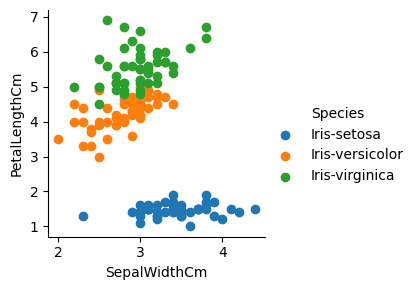

In [ ]:
#Scatter Plot to  visualize the datset
sns.FacetGrid(irisdf,hue='Species',height=3).map(plt.scatter,"SepalWidthCm" , "PetalLengthCm").add_legend()

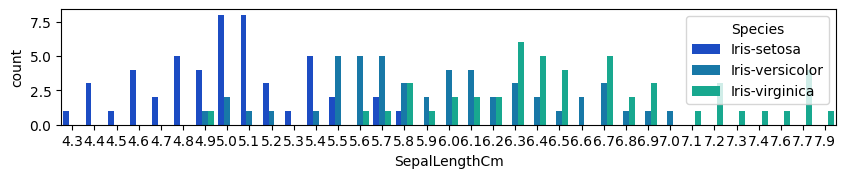

In [ ]:
plt.figure(figsize =(10,1.5))
sns.countplot(x='SepalLengthCm', data=irisdf, hue= irisdf['Species'], palette= 'winter')
plt.show()

In [ ]:
# Calculate correlations on numerical columns only
irisdf.select_dtypes(include=['number']).corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [ ]:
flower_mapping= {'Iris-setosa': 0, 'Iris-versicolor' : 1, 'Iris-virginica' :2}
irisdf['Species'] = irisdf ['Species'].map (flower_mapping)
irisdf.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,NaN
1,2,4.9,3.0,1.4,0.2,NaN
2,3,4.7,3.2,1.3,0.2,NaN
3,4,4.6,3.1,1.5,0.2,NaN
4,5,5.0,3.6,1.4,0.2,NaN


In [ ]:
irisdf.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


In [ ]:
x=irisdf[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']].values
y=irisdf[['Species']].values
model = lr()
model.fit(x,y)


LinearRegression()

In [ ]:
expected = y
predicted = model.predict(x)
predicted

array([[-8.26582725e-02],
       [-3.85897565e-02],
       [-4.81896914e-02],
       [ 1.26087761e-02],
       [-7.61081708e-02],
       [ 5.68023484e-02],
       [ 3.76259158e-02],
       [-4.45599433e-02],
       [ 2.07050198e-02],
       [-8.13030749e-02],
       [-1.01728663e-01],
       [ 8.84875996e-05],
       [-8.86050221e-02],
       [-1.01834705e-01],
       [-2.26997797e-01],
       [-4.36405904e-02],
       [-3.39982044e-02],
       [-2.16688605e-02],
       [-3.26854579e-02],
       [-1.22408563e-02],
       [-4.30562522e-02],
       [ 5.31726003e-02],
       [-1.23012138e-01],
       [ 1.77258467e-01],
       [ 6.81889023e-02],
       [-4.16362637e-03],
       [ 1.00119019e-01],
       [-7.09322806e-02],
       [-8.92083742e-02],
       [ 1.99107233e-02],
       [ 1.33606216e-02],
       [ 3.35222953e-02],
       [-1.58465961e-01],
       [-1.57523171e-01],
       [-8.13030749e-02],
       [-1.03812269e-01],
       [-1.49254996e-01],
       [-8.13030749e-02],
       [-6.4